# 3) Loading Packages and Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import pymongo
import datetime
from statistics import mean
import collections

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from time import time
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import preprocessing
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import mean_squared_error


# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

!pip install -U jupyter
!pip3 install numpy==1.16.4
!pip install --upgrade pip
!pip3 install -U seaborn==0.9.0
!pip install pandasql
!pip install pymongo


from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# Pandas, and NumPy: 

from time import time


# Import the required libraries

import pymongo
import datetime
import collections

import scipy.stats



  Using cached numpy-1.16.4.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Running setup.py install for numpy: started
  Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [264 lines of output]
  Running from numpy source directory.
  C:\Users\ajarir\AppData\Local\Temp\pip-install-8v8uvigz\numpy_132bf43cc29348c5bb0bfa18e2c72b2a\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
    return is_string(s) and ('*' in s or '?' is s)
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries blis not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  openblas_info:
  No module

  Moving to c:\users\ajarir\anaconda3\lib\site-packages\numpy-1.20.3.dist-info\
   from C:\Users\ajarir\anaconda3\Lib\site-packages\~umpy-1.20.3.dist-info
  Moving to c:\users\ajarir\anaconda3\lib\site-packages\numpy\
   from C:\Users\ajarir\anaconda3\Lib\site-packages\~umpy
  Moving to c:\users\ajarir\anaconda3\scripts\f2py-script.py
   from C:\Users\ajarir\AppData\Local\Temp\pip-uninstall-0i2p3z1a\f2py-script.py
  Moving to c:\users\ajarir\anaconda3\scripts\f2py.exe
   from C:\Users\ajarir\AppData\Local\Temp\pip-uninstall-0i2p3z1a\f2py.exe



  Could not locate executable ifl
  customize AbsoftFCompiler
  Could not locate executable f90
  customize CompaqVisualFCompiler
  Found executable C:\Users\ajarir\anaconda3\Library\usr\bin\DF.exe
  customize IntelItaniumVisualFCompiler
  Could not locate executable efl
  customize Gnu95FCompiler
  Could not locate executable gfortran
  Could not locate executable f95
  customize G95FCompiler
  Could not locate executable g95
  customize IntelEM64VisualFCompiler
  customize IntelEM64TFCompiler
  Could not locate executable efort
  Could not locate executable efc
  customize PGroupFlangCompiler
  Could not locate executable flang
  don't know how to compile Fortran code on platform 'nt'
    NOT AVAILABLE
  
  atlas_3_10_blas_threads_info:
  Setting PTATLAS=ATLAS
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries tatlas not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\ajarir\anaconda3\python.exe -m pip install --upgrade pip


In [2]:
from sklearn.preprocessing import MinMaxScaler

# Reading the data

In [3]:

# read in all our data
train = pd.read_csv("data/train.csv")
test = pd.read_csv('data/test.csv')


# 4) Data Structure and Content

In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [34]:
test.shape

(5681, 11)

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [6]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [7]:
test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [8]:
test['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

# 5) Exploratory Data Analysis
Find the normality, and consistency of the data

# Checking the correctness of the data
## Finding the number of null, and duplicated values

In [27]:
total_outliers = 0

for column in test:
    if column != 'label':
        print ("Outliers in: " + column + ": ")
        try:
            outliers = test[test[column] > test[column].mean() + 3 * test[column].std()]
            print (len(outliers))
            total_outliers += len(outliers)
        except:
            print("0")

#outliers = [x for x in dataframe[] if x < lower or x > upper]
print('Identified outliers: %d' % total_outliers)


Outliers in: Item_Identifier: 
0
Outliers in: Item_Weight: 
0
Outliers in: Item_Fat_Content: 
0
Outliers in: Item_Visibility: 
81
Outliers in: Item_Type: 
0
Outliers in: Item_MRP: 
0
Outliers in: Outlet_Identifier: 
0
Outliers in: Outlet_Establishment_Year: 
0
Outliers in: Outlet_Size: 
0
Outliers in: Outlet_Location_Type: 
0
Outliers in: Outlet_Type: 
0
Identified outliers: 81


# Visualize the outliers in Item_Visibility and Item_Outlet_Sales columns

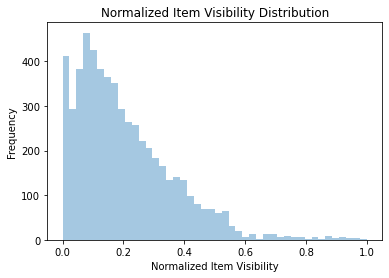

In [29]:


# Normalize the data
normalized_data = (test['Item_Visibility'] - test['Item_Visibility'].min()) / (test['Item_Visibility'].max() - test['Item_Visibility'].min())

# Plot the histogram
sns.distplot(normalized_data, kde=False)
plt.xlabel('Normalized Item Visibility')
plt.ylabel('Frequency')
plt.title('Normalized Item Visibility Distribution')
plt.show()


# Show box plot for the outlirers of the data

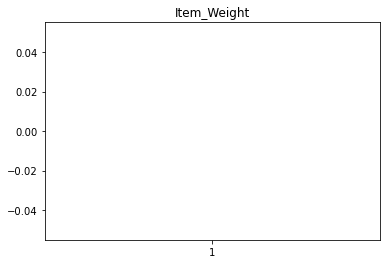

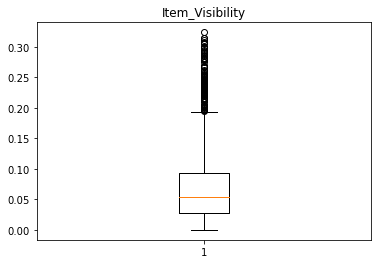

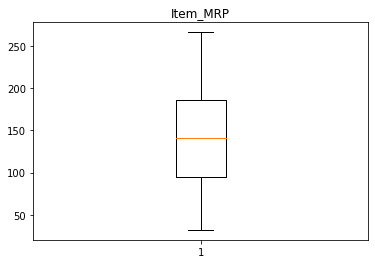

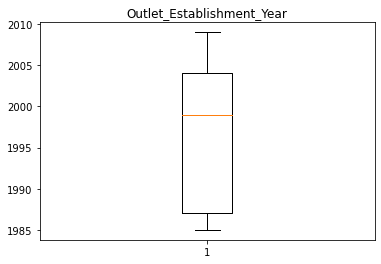

In [30]:

numeric_cols = test._get_numeric_data().columns
for col in numeric_cols:
    plt.boxplot(test[col])
    plt.title(col)
    plt.show()


In [31]:
numeric_features = test.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
dtype: object

In [32]:
corr =numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.019089,0.049809,0.018918
Item_Visibility,-0.019089,1.000000,-0.014013,-0.097040
Item_MRP,0.049809,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.018918,-0.097040,-0.007233,1.000000


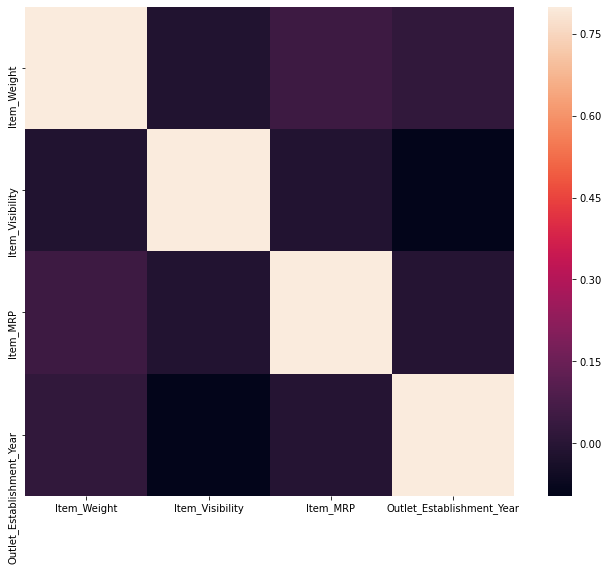

In [19]:
# correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

# 6) Univariate Analysis
Visualzing the featueres

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

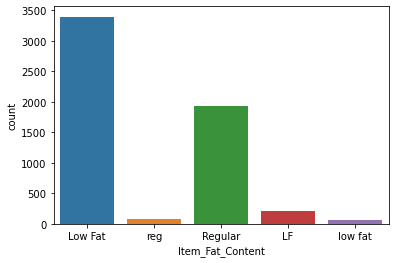

In [20]:
sns.countplot(test.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Snack Foods'),
  Text(1, 0, 'Dairy'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Baking Goods'),
  Text(5, 0, 'Health and Hygiene'),
  Text(6, 0, 'Breads'),
  Text(7, 0, 'Hard Drinks'),
  Text(8, 0, 'Seafood'),
  Text(9, 0, 'Soft Drinks'),
  Text(10, 0, 'Household'),
  Text(11, 0, 'Frozen Foods'),
  Text(12, 0, 'Meat'),
  Text(13, 0, 'Canned'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Breakfast')])

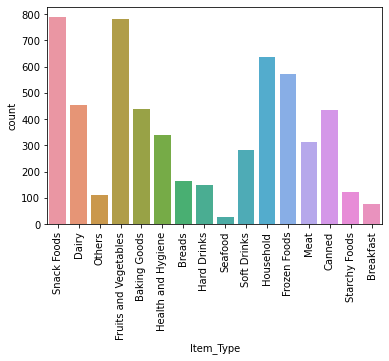

In [21]:
sns.countplot(test.Item_Type)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

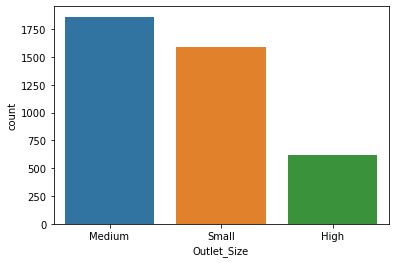

In [35]:
sns.countplot(test.Outlet_Size)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

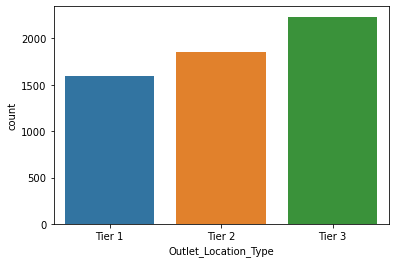

In [36]:
sns.countplot(test.Outlet_Location_Type)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Grocery Store'),
  Text(2, 0, 'Supermarket Type3'),
  Text(3, 0, 'Supermarket Type2')])

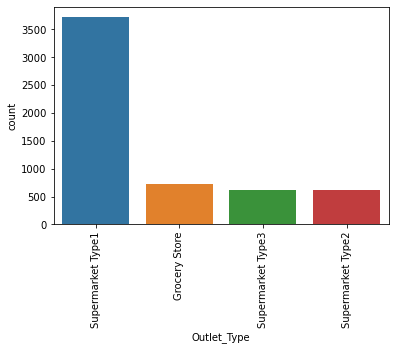

In [37]:
sns.countplot(test.Outlet_Type)
plt.xticks(rotation=90)


# 7) Bivariate Analysis
Visualzing the relationship between the featueres, which has numeric values, and the target

# scatter plot with box plot overlay

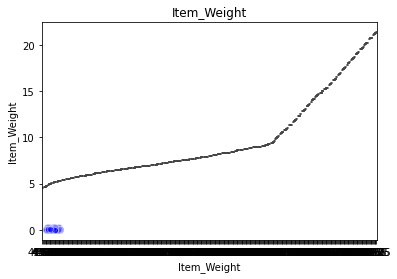

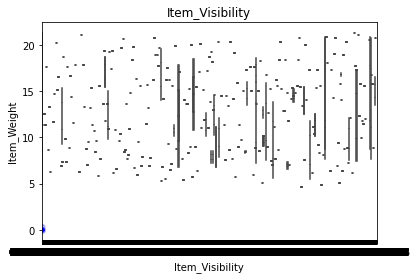

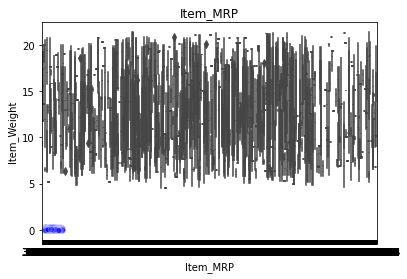

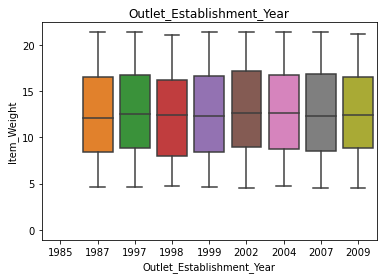

In [38]:
# scatter plot with box plot overlay
for col in numeric_cols:
    sns.scatterplot(data=test, x=col, y="Item_Visibility", color='blue', alpha=0.3)
    sns.boxplot(data=test, x=col, y="Item_Weight")
    plt.title(col)
    plt.show()
